In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as pt
import warnings 
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
import  statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
df=pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.shape

(10000, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [54]:
df.columns

Index(['Hours_Studied', 'Previous_Scores', 'Extracurri_Act', 'Sleep_Hours',
       'Sam_Que_Pap_Practice', 'Performance_Index'],
      dtype='object')

In [31]:
df= df.rename(columns={'Hours Studied':'Hours_Studied',
                       'Previous Scores':'Previous_Scores',
                       'Extracurricular Activities':'Extracurri_Act',
                       'Sleep Hours':'Sleep_Hours',
                       'Sample Question Papers Practiced':'Sam_Que_Pap_Practice',
                       'Performance Index':'Performance_Index'})
df

,Hours_Studied,Previous_Scores,Extracurri_Act,Sleep_Hours,Sam_Que_Pap_Practice,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [36]:
continuous=df.drop('Extracurri_Act',axis=1)
catagorical=df['Extracurri_Act']


In [49]:
df.describe()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sam_Que_Pap_Practice,Performance_Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
df['Hours_Studied'].unique()

array([7, 4, 8, 5, 3, 6, 2, 1, 9], dtype=int64)

In [10]:
df['Previous_Scores'].unique()

array([99, 82, 51, 52, 75, 78, 73, 45, 77, 89, 91, 79, 47, 72, 83, 54, 96,
       74, 85, 61, 62, 84, 94, 90, 44, 70, 67, 97, 59, 55, 68, 63, 46, 76,
       43, 81, 93, 98, 48, 92, 64, 88, 60, 87, 40, 69, 80, 95, 49, 50, 53,
       71, 56, 58, 66, 65, 57, 41, 42, 86], dtype=int64)

In [11]:
df['Extracurri_Act'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df['Sleep_Hours'].unique()

array([9, 4, 7, 5, 8, 6], dtype=int64)

In [14]:
df['Sam_Que_Pap_Practice'].unique()

array([1, 2, 5, 6, 0, 8, 3, 4, 9, 7], dtype=int64)

In [28]:

df['Performance_Index'].unique()


array([ 91.,  65.,  45.,  36.,  66.,  61.,  63.,  42.,  69.,  84.,  73.,
        27.,  33.,  68.,  43.,  67.,  70.,  30.,  71.,  85.,  57.,  35.,
        49.,  83.,  74.,  39.,  58.,  47.,  60.,  32.,  64.,  54.,  17.,
        53.,  75.,  52.,  78.,  38.,  98.,  87.,  41.,  81.,  15.,  88.,
        95.,  29.,  21.,  76.,  25.,  34.,  50.,  56.,  82.,  23.,  46.,
        92.,  77.,  86.,  44.,  94.,  40., 100.,  31.,  26.,  18.,  51.,
        72.,  16.,  28.,  89.,  48.,  37.,  62.,  59.,  19.,  79.,  22.,
        10.,  90.,  80.,  24.,  20.,  96.,  55.,  97.,  12.,  93.,  14.,
        99.,  11.,  13.])

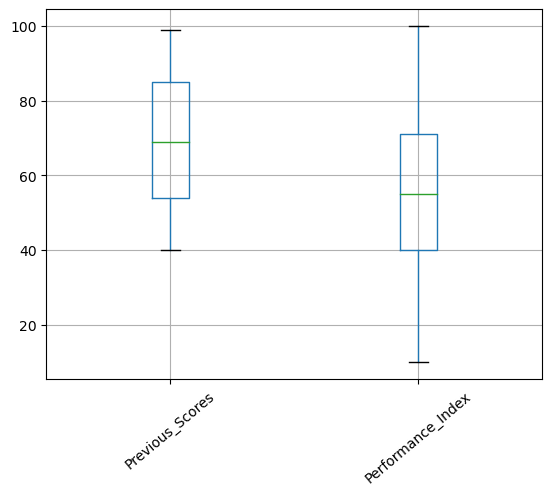

In [59]:
df.boxplot(column=[ 'Previous_Scores', 'Performance_Index'])
pt.xticks(rotation=40)
pt.show()

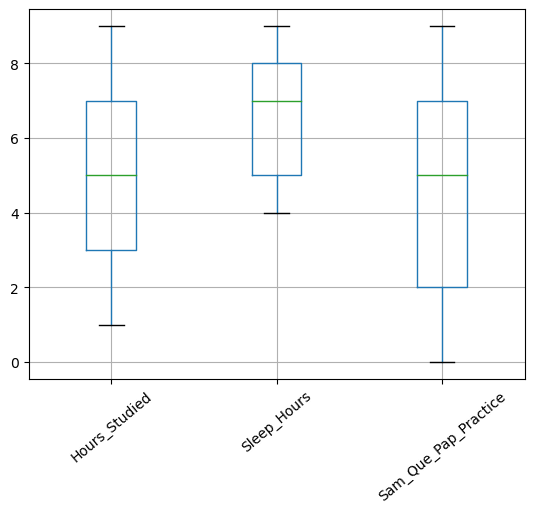

In [60]:
df.boxplot(column=['Hours_Studied', 'Sleep_Hours','Sam_Que_Pap_Practice'])
pt.xticks(rotation=40)
pt.show()

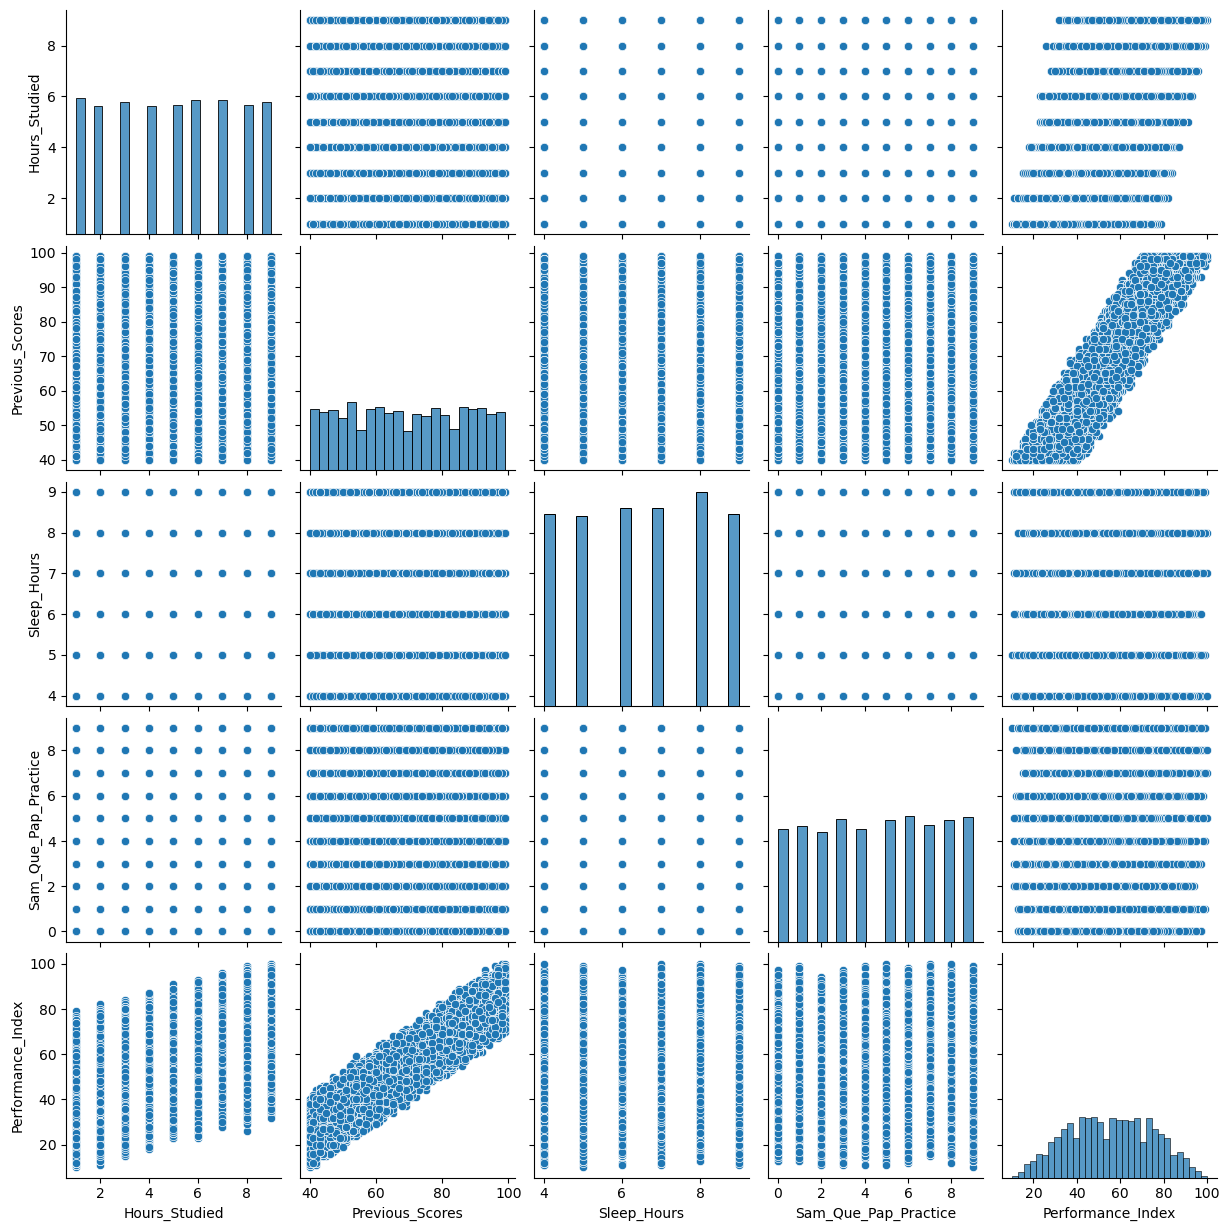

In [30]:
sn.pairplot(df)
pt.show()

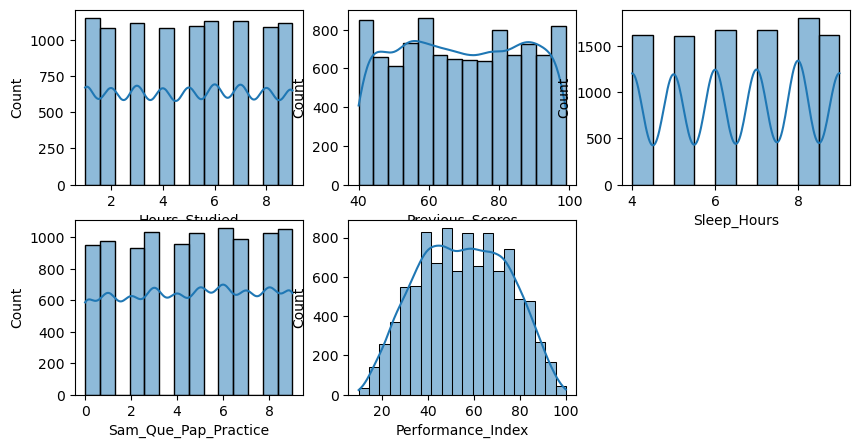

In [39]:
pt.figure(figsize=(10,5))
pt.subplot(2,3,1)
sn.histplot(df['Hours_Studied'],bins=14,kde=True)
pt.subplot(2,3,2)
sn.histplot(df['Previous_Scores'],bins=14,kde=True)
pt.subplot(2,3,3)
sn.histplot(df['Sleep_Hours'],bins=10,kde=True)
pt.subplot(2,3,4)
sn.histplot(df['Sam_Que_Pap_Practice'],bins=14,kde=True)
pt.subplot(2,3,5)
sn.histplot(df['Performance_Index'],bins=20,kde=True)
pt.show()

In [69]:
df.skew()

Hours_Studied          -0.004213
Previous_Scores         0.004502
Extracurri_Act          0.020804
Sleep_Hours            -0.039474
Sam_Que_Pap_Practice   -0.035636
Performance_Index      -0.001740
dtype: float64

In [48]:
continuous.corr()

,Hours_Studied,Previous_Scores,Sleep_Hours,Sam_Que_Pap_Practice,Performance_Index
Hours_Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous_Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep_Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sam_Que_Pap_Practice,0.017463,0.007888,0.003990,1.000000,0.043268
Performance_Index,0.373730,0.915189,0.048106,0.043268,1.000000


<Axes: >

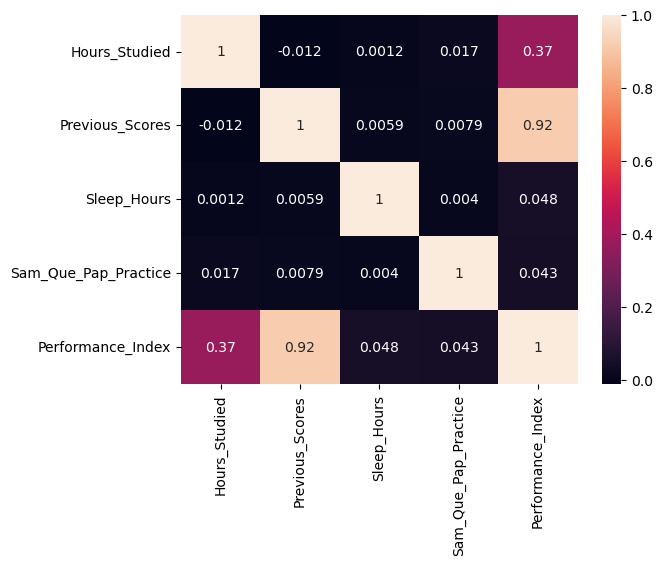

In [68]:
sn.heatmap(continuous.corr(),annot=True)

# no data cleaning

# data wrangning

In [64]:
# feature encoding 


df['Extracurri_Act']=pd.get_dummies(df['Extracurri_Act'],drop_first=True,dtype=int)df

# model selection 

In [72]:
X=df.drop('Performance_Index',axis=1)
y=df['Performance_Index']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

# creating a model 
model= LinearRegression()
model.fit(X_train,y_train)
print('coefficient:',model.coef_)
print('intercept :',model.intercept_)

# to predict the output values
ypred_train = model.predict(X_train)


# calculating the rmse and r2 values by train data 
print("train rmse :",np.sqrt(mean_squared_error(y_train,ypred_train)))
print('train r2 score :',r2_score(y_train,ypred_train ))

# to validata test accuracy == cross validation 
print('cross validation :',cross_val_score(model,X,y,cv=5,scoring='r2').mean())


#to predict the test values 
ypred_test=model.predict(X_test)

# calculating the rmse and r2 values by test data
print("test rmse :",np.sqrt(mean_squared_error(y_test,ypred_test)))
print('test r2 score :',r2_score(y_test,ypred_test ))


coefficient: [2.85568051 1.01898196 0.59806307 0.47657459 0.18830214]
intercept : -34.05789385431113
train rmse : 2.033205240774346
train r2 score : 0.9888163082551437
cross validation : 0.9887338678935833
test rmse : 2.055242749836076
test r2 score : 0.9884855999665682


In [73]:
model1=smf.ols('y~X',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.757e+05
Date:                Sun, 14 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:57:52   Log-Likelihood:                -21307.
No. Observations:               10000   AIC:                         4.263e+04
Df Residuals:                    9994   BIC:                         4.267e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.0756      0.127   -268.010      0.000     -34.325     -33.826
X[0]           2.8530      0.008    362.353      0.000       2.838       2.868
X[1]           1.0184      0.001    866.450      0.000       1.016       1.021
X[2]           0.6129      0.041     15.029      0.000       0.533       0.693
X[3]           0.4806      0.012     39.972      0.000       0.457       0.504
X[4]           0.1938      0.007     27.257      0.000       0.180       0.208
==============================================================================
Omnibus:                        3.851   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                4.036
Skew:                           0.013   Prob(JB):                        0.133
Kurtosis:                       3.095   Cond. No.                         452.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

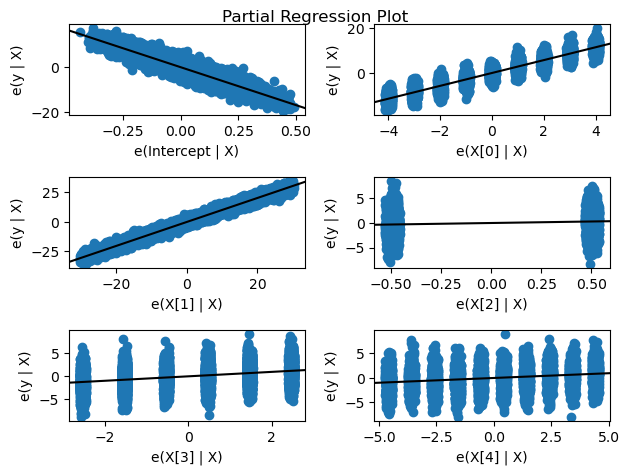

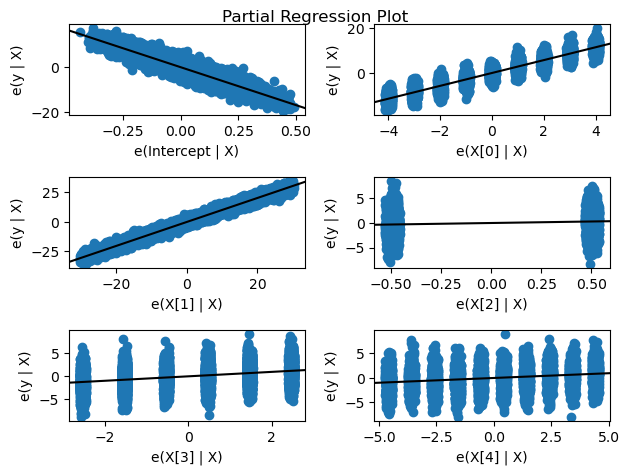

In [77]:
sm.graphics.plot_partregress_grid(model1)

# checking assumptions

In [82]:
test_res=y_test-ypred_test

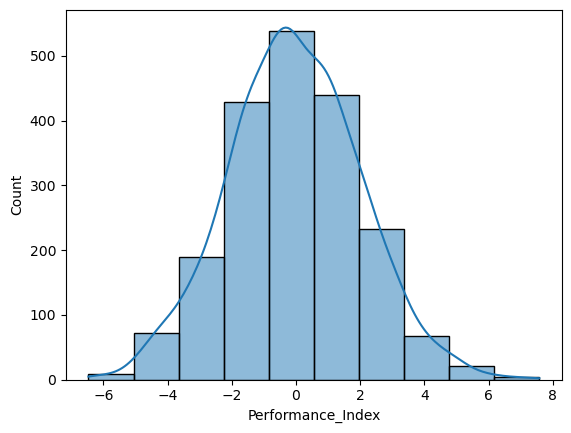

In [83]:
sn.histplot(test_res,bins=10,kde=True)
pt.show()

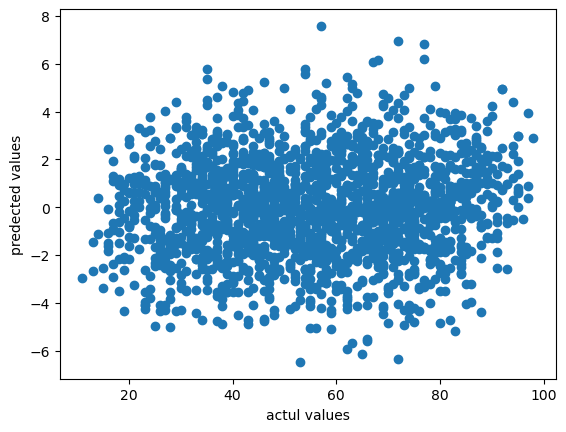

In [84]:
pt.scatter(y_test,test_res)
pt.xlabel("actul values")
pt.ylabel("predected values")
pt.show()

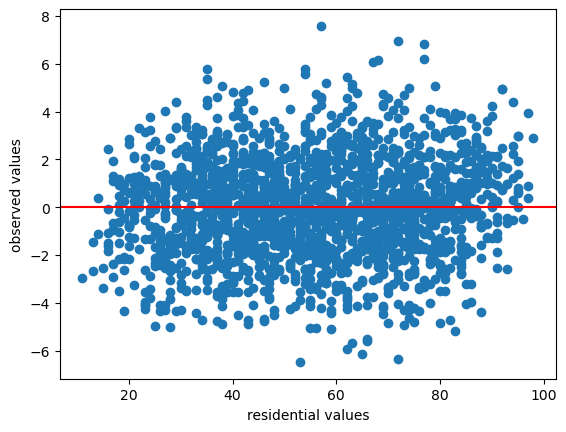

In [85]:
pt.scatter(y_test,test_res)
pt.axhline(y=0,color='r')
pt.xlabel("residential values")
pt.ylabel("observed values")
pt.show()

# polynomial 

In [88]:
poly_model=PolynomialFeatures(degree=4)
poly_train=pd.DataFrame(poly_model.fit_transform(X_train))

model.fit(poly_train,y_train)
print("coefficient :",model.coef_)
print("intercept :",model.intercept_)

poly_ypred_train=model.predict(poly_train)
print(" poly train rmse :",np.sqrt(mean_squared_error(y_train,poly_ypred_train)))
print("poly tain r2 score :",r2_score(y_train,poly_ypred_train))
print("poly cross validation :",cross_val_score(model,poly_train,y_train,cv=5,scoring="r2").mean())

poly_test=pd.DataFrame(poly_model.transform(X_test))
poly_ypred_test=model.predict(poly_test )

print("poly test rmse :",np.sqrt(mean_squared_error(y_test,poly_ypred_test)))
print("poly test r2 score :",r2_score(y_test,poly_ypred_test))

coefficient : [ 2.01142592e-07  4.41815674e+00  1.21002389e+00 -2.02994164e+00
  7.50124541e+00 -3.03762904e-01 -1.03821842e-01  8.92484254e-04
  3.65852260e-01 -4.36662406e-01 -2.27623752e-01  3.53713965e-03
  1.16747403e-02 -1.22463761e-01 -2.08736020e-03 -2.02994320e+00
  1.00783159e+00  7.58668813e-03 -1.14742323e+00  3.06010045e-01
  8.29911042e-02 -4.00960384e-05 -4.05342581e-03  2.68679971e-03
  5.46507386e-02  2.26141879e-02 -8.27058039e-05 -5.50425868e-03
  3.12606193e-03  3.94391027e-03  3.65852310e-01 -1.18976627e-01
 -1.15775302e-02  1.98679179e-02  1.40518513e-02 -1.39350274e-02
 -4.79726196e-05 -1.65460023e-04  4.80745718e-04 -3.79979452e-04
  1.16747902e-02 -3.45433676e-03  6.44963225e-03  1.04723279e-02
  4.95025474e-03 -1.10682415e-03 -2.02994320e+00  1.00783158e+00
  7.58669148e-03 -1.45431494e-01 -5.30995409e-02 -1.17816005e-02
  1.00966744e-01 -8.03841216e-02  1.89735747e-02 -6.60015427e-03
  3.34014338e-04  5.60267907e-05  3.17332273e-04 -7.84909501e-04
 -1.0812288

# lasso regression 

In [89]:
estimator= Lasso()
params ={"alpha":list(range(1,100))}

model_hp=GridSearchCV(estimator,params,cv=5,scoring='r2')
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 1}

In [90]:
lasso_model=Lasso(alpha=1)
lasso_model.fit(X_train,y_train)
print(" lasso coefficent :",lasso_model.coef_)
print("lasso intercept :",lasso_model.intercept_)

lasso_ypred_train=lasso_model.predict(X_train)
print("lasso train rmse :",np.sqrt(mean_squared_error(y_train,lasso_ypred_train)))
print("lasso train r2 score :",r2_score(y_train,lasso_ypred_train))
print("lasso cross val :",cross_val_score(lasso_model,X_train,y_train,cv=5,scoring='r2').mean())

lasso_ypred_test=lasso_model.predict(X_test)
print("lasso test rmse :",np.sqrt(mean_squared_error(y_test,lasso_ypred_test)))
print("lasso test r2 score :",r2_score(y_test,lasso_ypred_test))


 lasso coefficent : [2.70823304 1.01586926 0.         0.12098135 0.06998836]
lasso intercept : -29.942246537731393
lasso train rmse : 2.201262430905588
lasso train r2 score : 0.9868910957818857
lasso cross val : 0.9868392277647235
lasso test rmse : 2.249039182985659
lasso test r2 score : 0.9862117513194892


In [91]:
X=df.drop(['Performance_Index','Extracurri_Act'],axis=1)
y=df['Performance_Index']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


In [92]:
lasso_model=Lasso(alpha=1)
lasso_model.fit(X_train,y_train)
print(" lasso coefficent :",lasso_model.coef_)
print("lasso intercept :",lasso_model.intercept_)

lasso_ypred_train=lasso_model.predict(X_train)
print("lasso train rmse :",np.sqrt(mean_squared_error(y_train,lasso_ypred_train)))
print("lasso train r2 score :",r2_score(y_train,lasso_ypred_train))
print("lasso cross val :",cross_val_score(lasso_model,X_train,y_train,cv=5,scoring='r2').mean())

lasso_ypred_test=lasso_model.predict(X_test)
print("lasso test rmse :",np.sqrt(mean_squared_error(y_test,lasso_ypred_test)))
print("lasso test r2 score :",r2_score(y_test,lasso_ypred_test))


 lasso coefficent : [2.70823304 1.01586926 0.12098135 0.06998836]
lasso intercept : -29.942246537731393
lasso train rmse : 2.2012624309055884
lasso train r2 score : 0.9868910957818857
lasso cross val : 0.9868392277647235
lasso test rmse : 2.2490391829856593
lasso test r2 score : 0.9862117513194892


# ridge regression

In [93]:
estimator =Ridge()
params={"alpha":list(range(1,100))}
model_h=GridSearchCV(estimator,params,cv=5,scoring='r2')
model_h.fit(X_train,y_train)
model_h.best_params_

{'alpha': 1}

In [94]:
elastic_model=Ridge(alpha=1)
elastic_model.fit(X_train,y_train)
print(" elastic coefficent :",elastic_model.coef_)
print("elastic intercept :",elastic_model.intercept_)

elastic_ypred_train=elastic_model.predict(X_train)
print("elastic train rmse :",np.sqrt(mean_squared_error(y_train,elastic_ypred_train)))
print("elastic train r2 score :",r2_score(y_train,elastic_ypred_train))
print("elastic cross val :",cross_val_score(elastic_model,X_train,y_train,cv=5,scoring='r2').mean())

elastic_ypred_test=elastic_model.predict(X_test)
print("elastic test rmse :",np.sqrt(mean_squared_error(y_test,elastic_ypred_test)))
print("elastic test r2 score :",r2_score(y_test,elastic_ypred_test))

 elastic coefficent : [2.8558158  1.01913011 0.47278159 0.18955119]
elastic intercept : -33.754000635581235
elastic train rmse : 2.0550603044358273
elastic train r2 score : 0.9885745875124968
elastic cross val : 0.9885360079624215
elastic test rmse : 2.0821715349821006
elastic test r2 score : 0.9881818887476589


# elastic net

In [95]:
estimator=ElasticNet()
params={'alpha':[1,2,3,5,6,7,8,9,10],'l1_ratio':[0.1,0.5,0.75,0.9,0.95,1]}
model_h1=GridSearchCV(estimator,params,cv=5,scoring='r2')
model_h1.fit(X_train,y_train)
model_h1.best_params_

{'alpha': 1, 'l1_ratio': 0.75}

In [98]:
elastic_model=ElasticNet(alpha=1,l1_ratio=0.75)
elastic_model.fit(X_train,y_train)
print(" elastic coefficent :",elastic_model.coef_)
print("elastic intercept :",elastic_model.intercept_)

elastic_ypred_train=elastic_model.predict(X_train)
print("elastic train rmse :",np.sqrt(mean_squared_error(y_train,elastic_ypred_train)))
print("elastic train r2 score :",r2_score(y_train,elastic_ypred_train))
print("elastic cross val :",cross_val_score(elastic_model,X_train,y_train,cv=5,scoring='r2').mean())

elastic_ypred_test=elastic_model.predict(X_test)
print("elastic test rmse :",np.sqrt(mean_squared_error(y_test,elastic_ypred_test)))
print("elastic test r2 score :",r2_score(y_test,elastic_ypred_test))

 elastic coefficent : [2.64627982 1.01564623 0.19142334 0.09899793]
elastic intercept : -30.209827432914608
elastic train rmse : 2.194829951552609
elastic train r2 score : 0.9869675969309673
elastic cross val : 0.9869180997372158
elastic test rmse : 2.233870575626639
elastic test r2 score : 0.9863971133466055
